# AAS / SPD 2025 Splinter Meeting: An introduction to DKIST data

## Examples working with the DKIST Python Tools

## VBI data - mosaics

This notebook evolved from an original version created by A. Davey, and is based on the information given in the [DKIST Python Tools Documentation](https://docs.dkist.nso.edu/projects/python-tools/en/stable/).

The DKIST User Tools were written by Stuart Mumford and Drew Leonard and are integrated with SunPy. This notebook does not cover any of the of the installation and setup information which is detailed in the User Tools documentation. This notebook assumes you have a functional python environment and **sunpy** and **dkist** packages installed.

## Searching for DKIST Datasets

Each dataset comprises a number of different files:
- An ASDF file containing all the metadata, and no data.
- A quality report PDF.
- An mp4 preview movie.
- A (large) number of FITS files, each containing calibrated data.

The ASDF, quality report and preview movie can all be downloaded without authenticating, the FITS files require the use of Globus. We assume you have it up and running.

Note: this applies to all DKIST datasets, not only those acquired by VBI.

In [6]:
import dkist.net
import astropy.units as u
from sunpy.net import Fido, attrs as a

This presentation uses data from proposal pid_2_114 and in particular VBI dataset BZLLR, acquired during coordination with Solar Orbiter Remote Science Window #12 in April 2024. The data is publicly available since its release, and is part of the highlighted datasets in the "DKIST Featured Observations" recently advertised: https://nso.atlassian.net/wiki/spaces/PDOI/pages/3585703967/DKIST+Featured+Observations

In [7]:
Fido.search(a.dkist.Proposal("pid_2_114"))

<sunpy.net.fido_factory.UnifiedResponse object at 0x17982d1d0>
Results from 1 Provider:

275 Results from the DKISTClient:

Product ID Dataset ID        Start Time               End Time        Instrument               Wavelength              
                                                                                                   nm                  
---------- ---------- ----------------------- ----------------------- ---------- --------------------------------------
  L1-VKRKH      ALDLJ 2023-10-16T22:02:47.512 2023-10-16T22:03:21.326       VISP 853.7002737559743 .. 854.6361356847904
  L1-WOAWV      AJQJL 2023-10-16T22:02:47.512 2023-10-16T22:03:21.326       VISP 589.0781010152846 .. 590.1252361761552
  L1-ZRQGA      AKPKJ 2023-10-16T22:02:47.509 2023-10-16T22:03:21.323       VISP 629.4184702795845 .. 631.0111021423852
  L1-JNKMI      BMENL 2023-10-16T18:51:04.688 2023-10-16T19:01:33.059       VISP 589.0781010152846 .. 590.1241837790086
  L1-RUSAL      BOJEX 2023-10-16T18:51:04.688 2023-10-16T19:01:33.059       VISP 853.7012736084624 .. 854.6361356847904
  L1-ALIMG      ANGZL 2023-10-17T00:03:31.695 2023-10-17T00:13:29.071       VISP 589.0781010152846 .. 590.1241837790086
  L1-IBCHS      AOJVX 2023-10-17T00:03:31.671 2023-10-17T00:13:29.046       VISP 629.4184702795845 .. 631.0094770078313
  L1-HTLPO      BLDMN 2023-10-16T18:21:47.697 2023-10-16T18:41:42.447       VISP 853.7012736084624 .. 854.6361356847904
  L1-WORHV      BRLEW 2023-10-16T19:06:07.701 2023-10-16T19:26:02.450       VISP 853.7012736084624 .. 854.6361356847904
  L1-UWXSY      BJQZW 2023-10-16T18:21:47.697 2023-10-16T18:41:42.447       VISP 589.0781010152846 .. 590.1241837790086
  L1-KMUPT      BKPLX 2023-10-16T18:21:47.672 2023-10-16T18:41:42.422       VISP 629.4184702795845 .. 631.0094770078313
  L1-PFXKU      BDDLM 2023-10-16T20:18:26.692 2023-10-16T20:38:21.442       VISP 853.7012736084624 .. 854.6361356847904
  L1-EIOPQ      ALDVN 2023-10-16T21:25:42.665 2023-10-16T21:45:37.415       VISP 629.4184702795845 .. 631.0094770078313
  L1-NZDHB      AMEVL 2023-10-16T21:25:42.689 2023-10-16T21:45:37.439       VISP 853.7012736084624 .. 854.6361356847904
  L1-FHAFW      BQLDN 2023-10-16T19:06:07.676 2023-10-16T19:26:02.426       VISP 629.4184702795845 .. 631.0094770078313
  L1-GPSFR      AYYOZ 2023-10-16T20:18:26.692 2023-10-16T20:38:21.442       VISP 589.0781010152846 .. 590.1241837790086
  L1-TDFZC      AKPVX 2023-10-16T21:25:42.689 2023-10-16T21:45:37.439       VISP 589.0781010152846 .. 590.1241837790086
  L1-QSKBJ      AXYNP 2023-10-16T19:44:26.709 2023-10-16T20:04:21.459       VISP 853.7012736084624 .. 854.6361356847904
  L1-SXCIN      BPMVE 2023-10-16T19:06:07.701 2023-10-16T19:26:02.450       VISP 589.0781010152846 .. 590.1241837790086
  L1-DJHZE      BEEMM 2023-10-16T20:48:52.711 2023-10-16T21:08:47.461       VISP 589.0781010152846 .. 590.1241837790086
  L1-BAEPX      AZYDR 2023-10-16T20:18:26.668 2023-10-16T20:38:21.418       VISP 629.4184702795845 .. 631.0094770078313
  L1-ZRJRA      AVZLY 2023-10-16T19:44:26.709 2023-10-16T20:04:21.459       VISP 589.0781010152846 .. 590.1241837790086
  L1-MQVZD      AGJOM 2023-10-16T20:48:52.686 2023-10-16T21:08:47.436       VISP 629.4184702795845 .. 631.0094770078313
  L1-VKLTH      AWVMV 2023-10-16T19:44:26.684 2023-10-16T20:04:21.434       VISP 629.4184702795845 .. 631.0094770078313
  L1-YVAEF      AJQVW 2023-10-16T20:48:52.711 2023-10-16T21:08:47.461       VISP 853.7012736084624 .. 854.6361356847904
  L1-LYNAP      BNGDL 2023-10-16T18:51:04.664 2023-10-16T19:01:33.035       VISP 629.4184702795845 .. 631.0094770078313
  L1-UWZNY      APMLE 2023-10-17T00:03:31.695 2023-10-17T00:13:29.071       VISP 853.7012736084624 .. 854.6361356847904
  L1-KMPLT      BRLOL 2023-10-16T21:11:16.532 2023-10-16T21:17:01.185       VISP 589.0781010152846 .. 590.1252361761552
  L1-QSHSJ      BYYZX 2023-10-16T18:14:27.517 2023-10-16T18:20:12.195       VISP 853.7002737559743 .. 854.6361356847904
  L1-NZCWB      BMEZQ 2023-10-16T20:

There is a lot of information here - from the instrument, wavelength range, time of execution, number of frames etc. We go through several of them in the next cells. Note also that the same program (pid_2_114) was run in multiple days. 
NB: the order of appearance is not meaningful. 

We now restrict the search only to VBI:

In [8]:
res = Fido.search(a.dkist.Proposal("pid_2_114") & a.Instrument.vbi)
res

<sunpy.net.fido_factory.UnifiedResponse object at 0x16e51ee90>
Results from 1 Provider:

107 Results from the DKISTClient:

Product ID Dataset ID        Start Time               End Time        Instrument   Wavelength  
                                                                                       nm      
---------- ---------- ----------------------- ----------------------- ---------- --------------
  L1-MQKRD      AZYQR 2023-10-16T18:16:13.360 2023-10-16T18:19:52.720        VBI 450.0 .. 450.0
  L1-YVLIF      BDDXM 2023-10-16T18:16:40.782 2023-10-16T18:18:30.462        VBI 486.0 .. 486.0
  L1-NZJTB      AJQWW 2023-10-16T18:45:19.360 2023-10-16T18:48:58.720        VBI 450.0 .. 450.0
  L1-PFGMU      AXYOP 2023-10-16T18:15:45.953 2023-10-16T18:19:25.313        VBI 393.0 .. 393.0
  L1-DJTRE      AYYPZ 2023-10-16T18:15:18.520 2023-10-16T18:18:57.880        VBI 430.0 .. 430.0
  L1-KMVWT      AOJWX 2023-10-16T19:37:47.782 2023-10-16T19:41:27.142        VBI 486.0 .. 486.0
  L1-CEOOM      APMXE 2023-10-16T20:12:04.953 2023-10-16T20:15:44.313        VBI 393.0 .. 393.0
  L1-TDHRC      BEEWM 2023-10-16T18:44:51.953 2023-10-16T18:48:31.313        VBI 393.0 .. 393.0
  L1-OCWYK      ANGWL 2023-10-16T19:37:20.360 2023-10-16T19:40:59.720        VBI 450.0 .. 450.0
  L1-IBETS      ALDWN 2023-10-16T19:36:52.953 2023-10-16T19:40:32.313        VBI 393.0 .. 393.0
  L1-JNDJI      BVZGY 2023-10-16T20:12:59.782 2023-10-16T20:16:39.142        VBI 486.0 .. 486.0
  L1-EICFQ      AGJZM 2023-10-16T18:44:24.520 2023-10-16T18:49:53.560        VBI 430.0 .. 430.0
  L1-ALBQG      AKPWX 2023-10-16T18:45:46.782 2023-10-16T18:49:26.142        VBI 486.0 .. 486.0
  L1-UWRZY      AMEWL 2023-10-16T19:36:25.520 2023-10-16T19:41:54.560        VBI 430.0 .. 430.0
  L1-LYGUP      BWVJV 2023-10-16T20:42:26.953 2023-10-16T20:46:06.313        VBI 393.0 .. 393.0
  L1-HTFWO      AQLXN 2023-10-16T20:11:37.520 2023-10-16T20:17:06.560        VBI 430.0 .. 430.0
  L1-XGSBZ      ARLXW 2023-10-16T20:12:32.360 2023-10-16T20:16:11.720        VBI 450.0 .. 450.0
  L1-RUAUL      BXYKP 2023-10-16T20:41:59.520 2023-10-16T20:47:28.560        VBI 430.0 .. 430.0
  L1-SXJZN      BYYLZ 2023-10-16T20:42:54.360 2023-10-16T20:46:33.720        VBI 450.0 .. 450.0
  L1-VKFEH      BGJRM 2023-10-16T21:12:23.360 2023-10-16T21:16:02.720        VBI 450.0 .. 450.0
  L1-FHUKW      BZYMR 2023-10-16T20:43:21.782 2023-10-16T20:47:01.142        VBI 486.0 .. 486.0
  L1-QSDGJ      BJQXW 2023-10-16T21:12:50.782 2023-10-16T21:16:30.142        VBI 486.0 .. 486.0
  L1-GPZOR      BKPXX 2023-10-16T21:19:22.953 2023-10-16T21:23:02.313        VBI 393.0 .. 393.0
  L1-WOYCV      ADDZM 2023-10-16T21:11:55.953 2023-10-16T21:15:35.313        VBI 393.0 .. 393.0
  L1-DJCLE      BNGXL 2023-10-16T21:20:17.782 2023-10-16T21:23:57.142        VBI 486.0 .. 486.0
  L1-ZRBYA      AEEPM 2023-10-16T21:11:28.520 2023-10-16T21:16:57.560        VBI 430.0 .. 430.0
  L1-MQTLD      BOJZX 2023-10-16T21:48:27.953 2023-10-16T21:52:07.313        VBI 393.0 .. 393.0
  L1-PFRDU      BMEXL 2023-10-16T21:19:50.360 2023-10-16T21:23:29.720        VBI 450.0 .. 450.0
  L1-TDOLC      BQLVN 2023-10-16T21:48:55.360 2023-10-16T21:52:34.720        VBI 450.0 .. 450.0
  L1-BASWX      BLDXN 2023-10-16T21:18:55.520 2023-10-16T21:24:24.560        VBI 430.0 .. 430.0
  L1-EIMWQ      BRLDW 2023-10-16T21:49:22.782 2023-10-16T21:53:02.142        VBI 486.0 .. 486.0
  L1-YVPSF      BPMRE 2023-10-16T21:48:00.520 2023-10-16T21:53:29.560        VBI 430.0 .. 430.0
  L1-ALXJG      AWVLV 2023-10-16T22:02:47.333 2023-10-16T22:03:11.707        VBI 430.0 .. 430.0
  L1-IBQCS      AXYMP 2023-10-16T22:32:56.953 2023-10-16T22:36:36.313        VBI 393.0 .. 393.0
  L1-KMHVT      BDDVM 2023-10-16T22:33:51.782 2023-10-16T22:37:31.142        VBI 486.0 .. 486.0
  L1-OCVFK      AZYOR 2023-10-16T22:33:24.360 2023-10-16T22:37:03.720        VBI 450.0 .. 450.0
  L1-CEKKM      BEEDM 2023-10-16T22:39:39.953 2023-10-16T22:43:19.313        VBI 393.0 .. 393.0
  L1-UWLAY      AYYNZ 2023-10-16T22:

Still, way too many. Let's restrict the search further, e.g. to one single observing day (Hawaii's spans 2 UTC days):

In [9]:
res = Fido.search(a.Time("2024/04/17 16:45:00", "2024/04/18 01:50:00") & a.Instrument.vbi)
res

<sunpy.net.fido_factory.UnifiedResponse object at 0x130095480>
Results from 1 Provider:

10 Results from the DKISTClient:

Product ID Dataset ID        Start Time               End Time        Instrument   Wavelength  
                                                                                       nm      
---------- ---------- ----------------------- ----------------------- ---------- --------------
  L1-UOXQY      AEKKM 2024-04-17T21:00:39.777 2024-04-17T21:05:46.377        VBI 450.0 .. 450.0
  L1-IATYS      ADJJM 2024-04-17T21:30:51.777 2024-04-17T21:35:58.377        VBI 450.0 .. 450.0
  L1-AYJOG      BZLLR 2024-04-17T22:39:48.777 2024-04-17T22:45:26.037        VBI 450.0 .. 450.0
  L1-OEPZK      BGMMM 2024-04-17T20:18:25.777 2024-04-17T20:23:32.377        VBI 450.0 .. 450.0
  L1-NRMYB      BYKKZ 2024-04-17T19:47:15.337 2024-04-17T19:56:06.004        VBI 450.0 .. 450.0
  L1-YKZTF      BVEEY 2024-04-17T21:37:53.337 2024-04-17T21:49:32.004        VBI 450.0 .. 450.0
  L1-MSWSD      ARNNW 2024-04-17T22:13:04.337 2024-04-17T22:33:17.670        VBI 450.0 .. 450.0
  L1-TJYSC      BWGGV 2024-04-17T21:08:40.337 2024-04-17T21:28:51.004        VBI 450.0 .. 450.0
  L1-DNVSE      AQMMN 2024-04-17T22:47:47.337 2024-04-17T23:08:00.670        VBI 450.0 .. 450.0
  L1-EBHAQ      BXJJP 2024-04-17T20:25:19.337 2024-04-17T20:45:35.337        VBI 450.0 .. 450.0

Manageable. We can now do some sorting and filtering from this table. For instance, if we are interested in choosing data with a particular value, we can show only that column plus a few to help us identify the data. Hint: this is often the Fried parameter, as it defines the seeing conditions. 

See [Reference/API](https://docs.dkist.nso.edu/projects/python-tools/en/stable/reference.html) for a full list of attributes you can search data on.

In [10]:
res[0]["Dataset ID", "Instrument", "Wavelength", "Start Time", "Average Fried Parameter", "Bounding Box"]

<dkist.net.client.DKISTQueryResponseTable object at 0x179d58f50>
Dataset ID Instrument   Wavelength          Start Time       Average Fried Parameter            Bounding Box          
                            nm                                                                                        
---------- ---------- -------------- ----------------------- ----------------------- ---------------------------------
     AEKKM        VBI 450.0 .. 450.0 2024-04-17T21:00:39.777     0.10157442466064683 (-284.07,586.36),(-400.18,467.56)
     ADJJM        VBI 450.0 .. 450.0 2024-04-17T21:30:51.777     0.09364266934392573  (-284.99,594.91),(-401.1,476.11)
     BZLLR        VBI 450.0 .. 450.0 2024-04-17T22:39:48.777     0.06729368195818512 (-237.18,-5.95),(-353.26,-124.72)
     BGMMM        VBI 450.0 .. 450.0 2024-04-17T20:18:25.777     0.08026018823846455  (-302.65,597.11),(-418.75,478.3)
     BYKKZ        VBI 450.0 .. 450.0 2024-04-17T19:47:15.337     0.04316190063440192  (-336.18,554.2),(-379.89,509.56)
     BVEEY        VBI 450.0 .. 450.0 2024-04-17T21:37:53.337      0.0715313297521768  (-320.42,558.93),(-364.13,514.3)
     ARNNW        VBI 450.0 .. 450.0 2024-04-17T22:13:04.337     0.07098293180844943 (-298.66,-49.53),(-342.37,-94.15)
     BWGGV        VBI 450.0 .. 450.0 2024-04-17T21:08:40.337     0.09817869849924714 (-323.02,554.18),(-366.74,509.54)
     AQMMN        VBI 450.0 .. 450.0 2024-04-17T22:47:47.337     0.07081907700735582 (-271.77,-40.76),(-315.48,-85.39)
     BXJJP        VBI 450.0 .. 450.0 2024-04-17T20:25:19.337     0.08983175529462115 (-338.82,559.99),(-382.54,515.35)

The Fried parameters is typical used as a proxy for "seeing quality" - the larger it is, the better the conditions. Values of 8-10 cm or more are considered very good; above 20 cm would be exceptional. Note that DKIST FITS headers store the value (ATMOS_R0) in meters, and also note that when the AO lock fails, ATMOS_R0 might be recorded with unrealistic high values (e.g. meters).

We could actually sort based on the average Fried parameter column, and showing the same columns as before. 

In [11]:
res[0].sort("Average Fried Parameter")
res[0]["Dataset ID", "Instrument", "Wavelength", "Start Time", "Average Fried Parameter", "Bounding Box"]

<dkist.net.client.DKISTQueryResponseTable object at 0x17973f410>
Dataset ID Instrument   Wavelength          Start Time       Average Fried Parameter            Bounding Box          
                            nm                                                                                        
---------- ---------- -------------- ----------------------- ----------------------- ---------------------------------
     BYKKZ        VBI 450.0 .. 450.0 2024-04-17T19:47:15.337     0.04316190063440192  (-336.18,554.2),(-379.89,509.56)
     BZLLR        VBI 450.0 .. 450.0 2024-04-17T22:39:48.777     0.06729368195818512 (-237.18,-5.95),(-353.26,-124.72)
     AQMMN        VBI 450.0 .. 450.0 2024-04-17T22:47:47.337     0.07081907700735582 (-271.77,-40.76),(-315.48,-85.39)
     ARNNW        VBI 450.0 .. 450.0 2024-04-17T22:13:04.337     0.07098293180844943 (-298.66,-49.53),(-342.37,-94.15)
     BVEEY        VBI 450.0 .. 450.0 2024-04-17T21:37:53.337      0.0715313297521768  (-320.42,558.93),(-364.13,514.3)
     BGMMM        VBI 450.0 .. 450.0 2024-04-17T20:18:25.777     0.08026018823846455  (-302.65,597.11),(-418.75,478.3)
     BXJJP        VBI 450.0 .. 450.0 2024-04-17T20:25:19.337     0.08983175529462115 (-338.82,559.99),(-382.54,515.35)
     ADJJM        VBI 450.0 .. 450.0 2024-04-17T21:30:51.777     0.09364266934392573  (-284.99,594.91),(-401.1,476.11)
     BWGGV        VBI 450.0 .. 450.0 2024-04-17T21:08:40.337     0.09817869849924714 (-323.02,554.18),(-366.74,509.54)
     AEKKM        VBI 450.0 .. 450.0 2024-04-17T21:00:39.777     0.10157442466064683 (-284.07,586.36),(-400.18,467.56)

## Downloading the ASDF File with Fido.fetch (VBI case)

For now, we've explored all the asdf files within a given program. Let's now pick a dataset and download its ASDF file and use it for further analysis. We look at VBI dataset BZLLR from the Table above. Remember, every dataset (VBI, ViSP, Cryo ..) relates to a single wavelength (range).

NOTE: Only the ASDF files can be downloaded with Fido. You need to use Globus if you want to download the FITS files containing the data (as done later in this notebook). 

In [12]:
res = Fido.search(a.dkist.Dataset("BZLLR")) 
asdf_file = Fido.fetch(res, path="~/DKIST/workshops/SPD_2025/tutorials/{instrument}/{dataset_id}/")

asdf_file

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

['/Users/gcauzzi/DKIST/workshops/SPD_2025/tutorials/VBI/BZLLR/VBI_L1_20240417T223948_BZLLR_metadata.asdf']

## Dataset Object

We can then use this ASDF file to construct a Dataset. The Dataset class is an extension to SunPy’s NDCube class and has multiple, useful functionalities (e.g., it is coordinate aware). See https://docs.dkist.nso.edu/projects/python-tools/en/latest/tutorial/3_the_dataset.html for more detail.

The Dataset object allows us to do some basic inspection of the dataset as a whole without having to download the entire thing, using the metadata in the FITS headers. This will save users time in that they can then only download the data they want, and it also eases the load on the DKIST Data Center servers. 

In [13]:
ds = dkist.load_dataset(asdf_file)
ds

This VBI Dataset is an array of (3, 3) Dataset objects and
consists of 108 frames.
Files are stored in /Users/gcauzzi/DKIST/workshops/SPD_2025/tutorials/VBI/BZLLR

This calibration has Dataset ID BZLLR.
The unique identifier for the input observe frames (Product ID) is (no ProductID).

Each Dataset has 3 pixel and 3 world dimensions.

The data are represented by a <class 'dask.array.core.Array'> object:
dask.array<reshape, shape=(12, 4096, 4096), dtype=float32, chunksize=(1, 4096, 4096), chunktype=numpy.ndarray>

Array Dim  Axis Name                  Data size  Bounds
        0  time                              12  None
        1  helioprojective latitude        4096  None
        2  helioprojective longitude       4096  None

World Dim  Axis Name                  Physical Type                   Units
        2  time                       time                            s
        1  helioprojective latitude   custom:pos.helioprojective.lat  arcsec
        0  helioprojective longitude 

This is a dkist.TiledDataset object, which is an array of dkist.Dataset objects, as this VBI dataset is tiled in space (or mosaicked).

Since there are 12 times (axis 0) and a total of 108 frames, each mosaic is composed of 108/12 = 9 tiles. Indeed, as this is the VBI blue arm (wav = 450 nm), each mosaic is composed of (3x3) tiles to cover the full FOV of 120"x120".

We then get information about both the pixel dimensions of the data (the coordinates of the detector grid) and the world dimensions (the physical coordinates of the image). For a VBI Dataset, this is straightforward, there are 3 "pixel" dimensions (x, y, z), corresponding to 3 "world (coordinate)" dimensions (solar x, solar y, t). It becomes more complicated for spectrographs and polarimeters!

The FITS headers from every file in a dataset are duplicated and stored in the ASDF file. This means that all the metadata about each file is accessible using only the ASDF file, **before** downloading any of the actual data. These headers are stored as a table in the headers attribute of the Dataset. E.g., for the first tile: 

In [14]:
ds[0,0].headers

<Table length=12>
BITPIX NAXIS NAXIS1 NAXIS2 NAXIS3 ... VBICFRAM VBIFRIED VBINMOSC VBICMOSC
int64  int64 int64  int64  int64  ...  int64   float64   int64    int64  
------ ----- ------ ------ ------ ... -------- -------- -------- --------
   -32     3   4096   4096      1 ...        1   -100.0       12        1
   -32     3   4096   4096      1 ...        1   -100.0       12        2
   -32     3   4096   4096      1 ...        1   -100.0       12        3
   -32     3   4096   4096      1 ...        1   -100.0       12        4
   -32     3   4096   4096      1 ...        1   -100.0       12        5
   -32     3   4096   4096      1 ...        1   -100.0       12        6
   -32     3   4096   4096      1 ...        1   -100.0       12        7
   -32     3   4096   4096      1 ...        1   -100.0       12        8
   -32     3   4096   4096      1 ...        1   -100.0       12        9
   -32     3   4096   4096      1 ...        1   -100.0       12       10
   -32     3   4096   4096      1 ...        1   -100.0       12       11
   -32     3   4096   4096      1 ...        1   -100.0       12       12

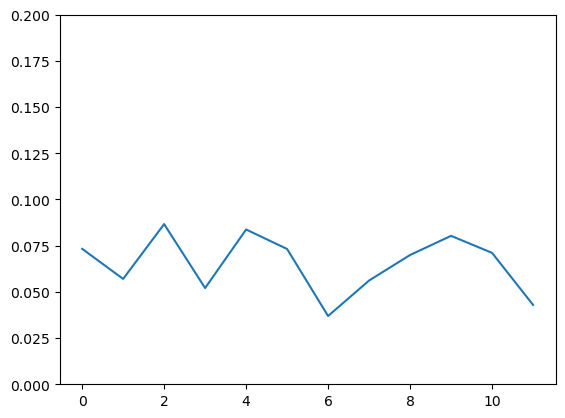

In [15]:
import matplotlib.pyplot as plt

plt.plot(ds[0,0].headers['ATMOS_R0']) 
#some times have bad seeing
plt.ylim(0, .2)
plt.show()

## Downloading FITS Data
This section assumes you have running Globus Connect Personal. You will need to do this to download FITS data to your machines. See the [Downloading Data](https://docs.dkist.nso.edu/projects/python-tools/en/stable/tutorial/5_downloading_data.html) section of the User Tools documentation to understand what you need to do. 
* If we know that we will want to download an entire dataset, there are the several ways to do this. e.g. by using the full dataset object. Let's start with only one tile for now

In [20]:
## These we have already. Repeated here just for clarity
#res = Fido.search(a.dkist.Dataset("BZLLR"))
#asdf_file = Fido.fetch(res, path="~/DKIST/workshops/SPD_2025/{instrument}/{dataset_id}/")


With the User Tools there is also the possibity of downloading subsets of files rather than the whole dataset. E.g. we
can extract only the central tile of the VBI mosaic

In [21]:
ds = dkist.load_dataset(asdf_file)[1, 1]
ds

This VBI Dataset consists of 12 frames.
Files are stored in /Users/gcauzzi/DKIST/workshops/SPD_2025/tutorials/VBI/BZLLR

This calibration has Dataset ID BZLLR.
The unique identifier for the input observe frames (Product ID) is (no ProductID).

This Dataset has 3 pixel and 3 world dimensions.

The data are represented by a <class 'dask.array.core.Array'> object:
dask.array<reshape, shape=(12, 4096, 4096), dtype=float32, chunksize=(1, 4096, 4096), chunktype=numpy.ndarray>

Array Dim  Axis Name                  Data size  Bounds
        0  time                              12  None
        1  helioprojective latitude        4096  None
        2  helioprojective longitude       4096  None

World Dim  Axis Name                  Physical Type                   Units
        2  time                       time                            s
        1  helioprojective latitude   custom:pos.helioprojective.lat  arcsec
        0  helioprojective longitude  custom:pos.helioprojective.lon  arcsec

Co

We now have only 12 frames, i.e. the central tile in time. 

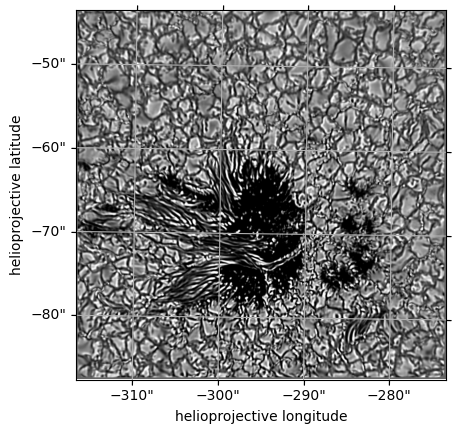

In [19]:
ax = ds[10].plot(vmin=20000, vmax=80000,cmap='gray')
ax.grid(True)

Note that the coordinates are part of the array

## Stitching a VBI Mosaic with reproject

We now take the whole 9 tiles and try to show them all together

In [22]:
# These are the same as before, here for clarity
#res = Fido.search(a.dkist.Dataset("BZLLR"))
#asdf_file = Fido.fetch(res, path="~/DKIST/workshops/SPD_2025/tutorials/{instrument}/{dataset_id}/")

# We now extract the whole array
ds = dkist.load_dataset(asdf_file)
ds

This VBI Dataset is an array of (3, 3) Dataset objects and
consists of 108 frames.
Files are stored in /Users/gcauzzi/DKIST/workshops/SPD_2025/tutorials/VBI/BZLLR

This calibration has Dataset ID BZLLR.
The unique identifier for the input observe frames (Product ID) is (no ProductID).

Each Dataset has 3 pixel and 3 world dimensions.

The data are represented by a <class 'dask.array.core.Array'> object:
dask.array<reshape, shape=(12, 4096, 4096), dtype=float32, chunksize=(1, 4096, 4096), chunktype=numpy.ndarray>

Array Dim  Axis Name                  Data size  Bounds
        0  time                              12  None
        1  helioprojective latitude        4096  None
        2  helioprojective longitude       4096  None

World Dim  Axis Name                  Physical Type                   Units
        2  time                       time                            s
        1  helioprojective latitude   custom:pos.helioprojective.lat  arcsec
        0  helioprojective longitude 

In [61]:
dkist.net.transfer_complete_datasets('BZLLR', path="~/DKIST/workshops/SPD_2025/tutorials/{instrument}/{dataset_id}")

|                                                                                                             …

PENDING: Starting Transfer
Task completed with SUCCEEDED status.


[PosixPath('~/DKIST/workshops/SPD_2025/tutorials/VBI/BZLLR')]

To start, we can make a composite plot of all the tiles, at the fifth timestep (slice_index = 4; seeing was pretty good).

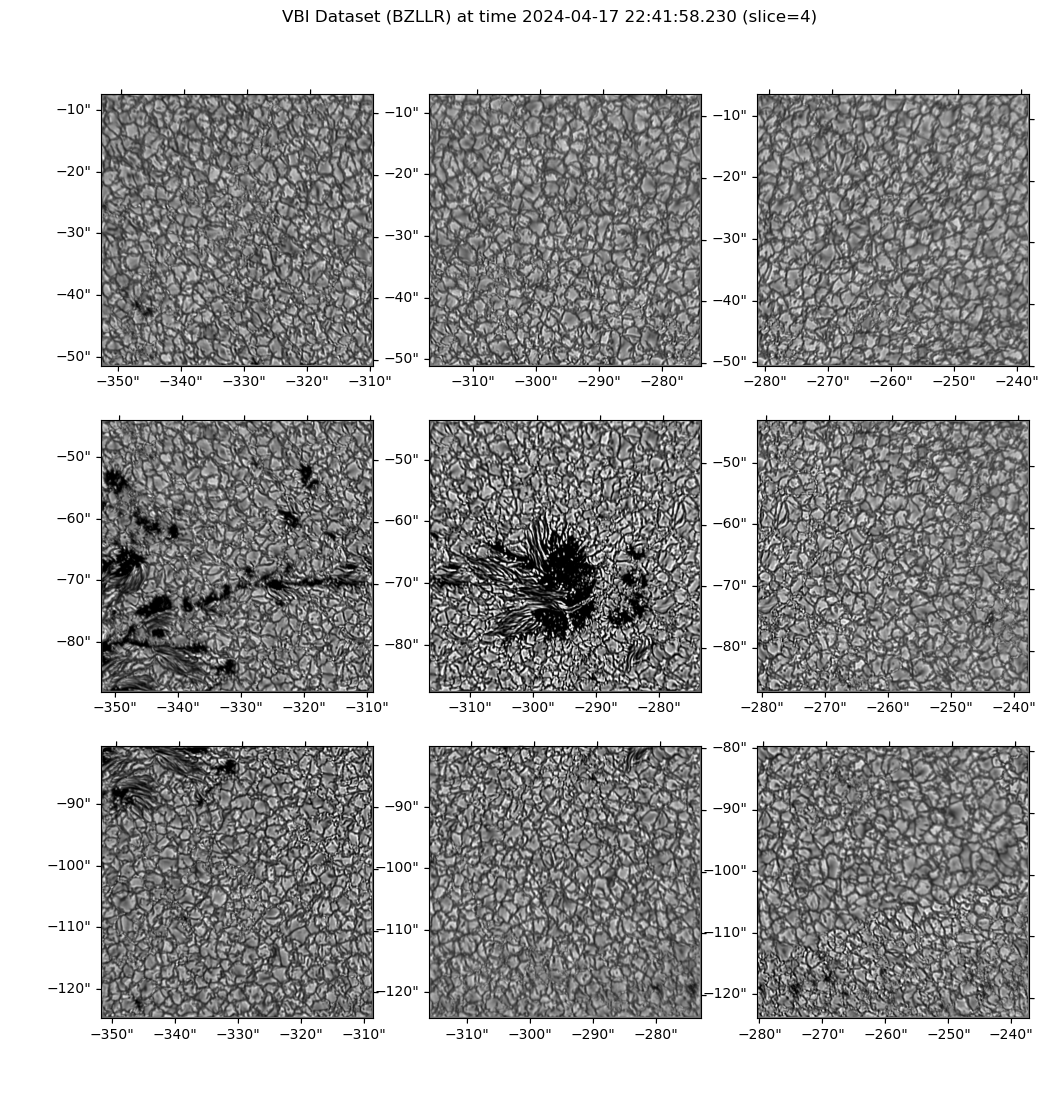

In [23]:
import numpy as np
import dkist
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 12))
fig = ds.plot(slice_index=4, share_zscale=True, vmin=20000, vmax=80000, cmap = 'gray')

The following steps allow to stitch the tiles together. We have the ds object already, but you'll need the **reproject** and **shapely** packages installed

In [24]:

from reproject.mosaicking import find_optimal_celestial_wcs, reproject_and_coadd
from reproject import reproject_interp

from ndcube import NDCube


First, let us crop off the edges of all our tiles to remove some artifacts, and only select the first time step. To do this we use the TiledDataset.slice_tiles helper which applies an array slice to each tile of the TiledDataset object.

In [25]:
first_tiles = ds.slice_tiles[4, 100:-100, 100:-100]

Next we need to calculate the optimal WCS for the output:

In [26]:
reference_wcs, shape_out = find_optimal_celestial_wcs(
    [f.wcs for f in first_tiles.flat],
    auto_rotate=True,
    # We drop the output resolution by a factor of 10 to reduce memory
    # remove this line to run at the native resolution of the input data
    resolution=0.1*u.arcsec,
)

# Due to a bug in reproject we need to reverse the direction of the longitude axis
# https://github.com/astropy/reproject/issues/431
reference_wcs.wcs.cdelt[0] = -reference_wcs.wcs.cdelt[0]

Now we can do the actual reprojection

In [27]:
arr, footprint = reproject_and_coadd(
    first_tiles.flat,
    reference_wcs,
    reproject_function=reproject_interp,
    shape_out=shape_out,
    roundtrip_coords=False,
)

2025-06-10 08:26:07 - reproject.mosaicking.coadd - INFO: Output mosaic will have shape (1152, 1125)
2025-06-10 08:26:07 - reproject.mosaicking.coadd - INFO: Using on-the-fly mode for adding individual reprojected images to output array
2025-06-10 08:26:07 - reproject.mosaicking.coadd - INFO: Processing input data 1 of 9
2025-06-10 08:26:07 - reproject.mosaicking.coadd - INFO: Calling reproject_interp with shape_out=(416, 422)
2025-06-10 08:26:07 - reproject.common - INFO: Computing input dask array to Numpy memory-mapped array
2025-06-10 08:26:08 - reproject.common - INFO: Numpy memory-mapped array is now at /var/folders/tt/mtl8xfm16hx9n867ck93psm40000gq/T/tmpey9hkfg0/3768a705-3e01-4b45-9a3c-f19c9ede6816.npy
2025-06-10 08:26:08 - reproject.common - INFO: Calling _reproject_full in non-dask mode
2025-06-10 08:26:08 - reproject.mosaicking.coadd - INFO: Adding reprojected array to final array
2025-06-10 08:26:08 - reproject.mosaicking.coadd - INFO: Processing input data 2 of 9
2025-06-10 

Make a new NDCube object and plot it

<WCSAxes: >

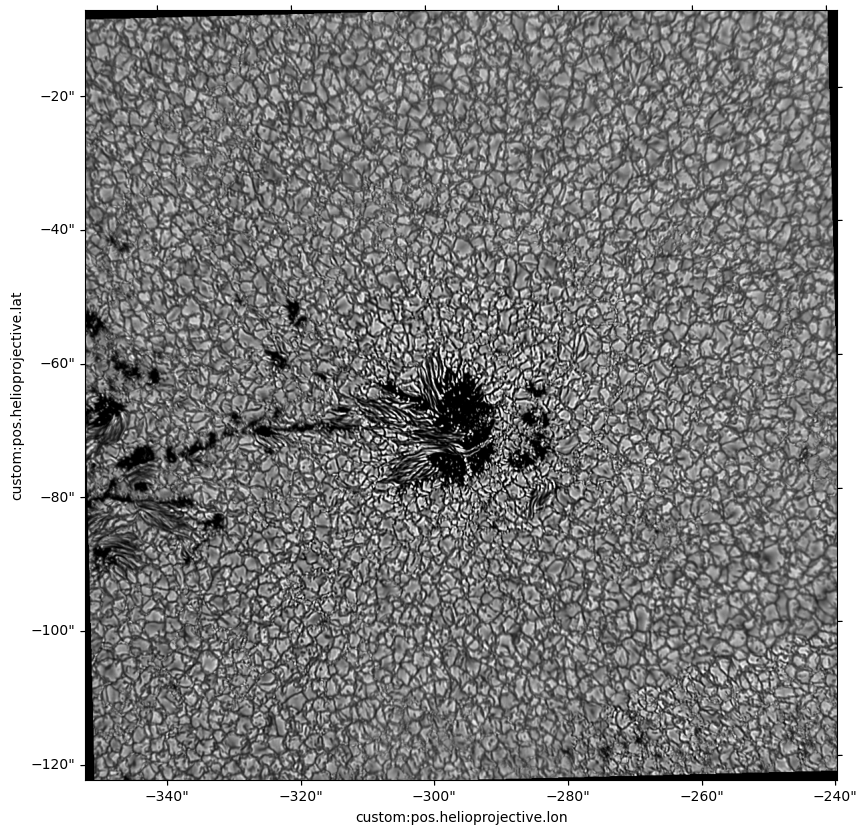

In [28]:
plt.figure(figsize=(10,10))
stitched = NDCube(arr, reference_wcs)
stitched.plot(vmin=20000, vmax=80000, cmap = 'gray')

Note that usually the center of the field has a better definition than the edges. This most often the case with AO, which works best near the "lock point" (usually the center of the FOV).

The stitching process is also described at https://docs.dkist.nso.edu/projects/python-tools/en/stable/examples/reproject_vbi_mosaic.html .

## Showing the Field of View of VBI on AIA

There are many ways to do this. Lucas will show another way later. This example is taken verbatim from https://docs.dkist.nso.edu/projects/python-tools/en/stable/examples/vbi_extents.html. 

Note: might not work flawlessly depending on the WiFi situation

In [29]:
# some additional imports

import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.time import Time

import sunpy.map
from sunpy.net import Fido, attrs as a
from sunpy.visualization import drawing

Let's extract the times of the 9 tiles, and look for the closest AIA 171:

In [30]:
times = Time([d.global_coords["time"] for d in first_tiles.flat]).sort()
times

<Time object: scale='utc' format='isot' value=['2024-04-17T22:41:30.977' '2024-04-17T22:41:34.384'
 '2024-04-17T22:41:37.790' '2024-04-17T22:41:41.197'
 '2024-04-17T22:41:44.604' '2024-04-17T22:41:48.010'
 '2024-04-17T22:41:51.417' '2024-04-17T22:41:54.824'
 '2024-04-17T22:41:58.230']>

In [31]:
results = Fido.search(a.Instrument.aia, a.Wavelength(171*u.AA), a.Time(times[0], times[-1], times[0]))
results

<sunpy.net.fido_factory.UnifiedResponse object at 0x1378ecdd0>
Results from 1 Provider:

1 Results from the VSOClient:
Source: https://sdac.virtualsolar.org/cgi/search
Data retrieval status: https://docs.virtualsolar.org/wiki/VSOHealthReport
Total estimated size: 67.789 Mbyte

       Start Time               End Time        Source Instrument   Wavelength   Provider  Physobs  Wavetype Extent Width Extent Length Extent Type   Size  
                                                                     Angstrom                                                                        Mibyte 
----------------------- ----------------------- ------ ---------- -------------- -------- --------- -------- ------------ ------------- ----------- --------
2024-04-17 22:41:33.000 2024-04-17 22:41:34.000    SDO        AIA 171.0 .. 171.0     JSOC intensity   NARROW         4096          4096    FULLDISK 64.64844

In [32]:
aia_files = Fido.fetch(results)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

In [34]:
# We load the downloaded AIA file into a sunpy.map.AIAMap object.

aia = sunpy.map.Map(aia_files)

<sunpy.map.sources.sdo.AIAMap object at 0x134b36ba0>
SunPy Map
---------
Observatory:		 SDO
Instrument:		 AIA 3
Detector:		 AIA
Measurement:		 171.0 Angstrom
Wavelength:		 171.0 Angstrom
Observation Date:	 2024-04-17 22:41:33
Exposure Time:		 1.999585 s
Dimension:		 [4096. 4096.] pix
Coordinate System:	 helioprojective
Scale:			 [0.599489 0.599489] arcsec / pix
Reference Pixel:	 [2052.562988 2048.371582] pix
Reference Coord:	 [0. 0.] arcsec                   
array([[-1., -2., -1., ...,  0., -1.,  1.],
       [-1., -1., -1., ..., -1., -2.,  2.],
       [ 2., -1.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  1.,  1., ..., -2., -2.,  0.],
       [ 0.,  1.,  1., ..., -1.,  1., -1.],
       [ 1., -1., -1., ..., -2., -2., -1.]],
      shape=(4096, 4096), dtype=float32)
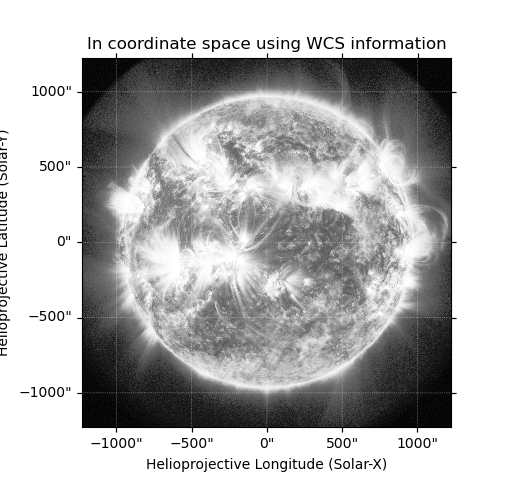
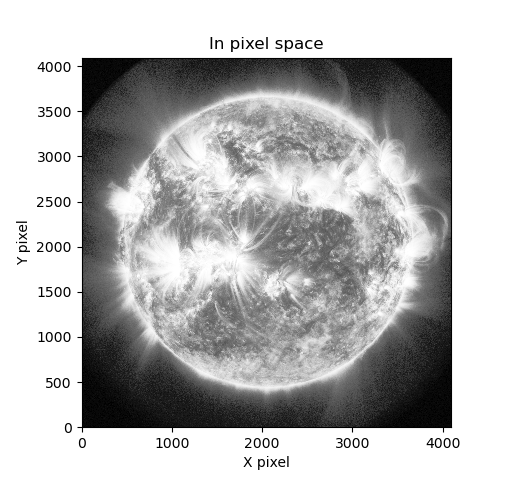
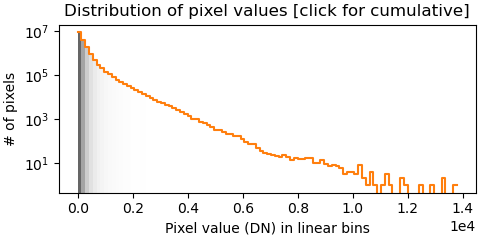
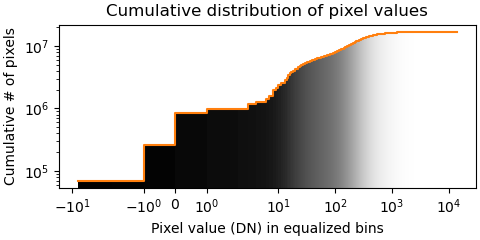

In [35]:
aia

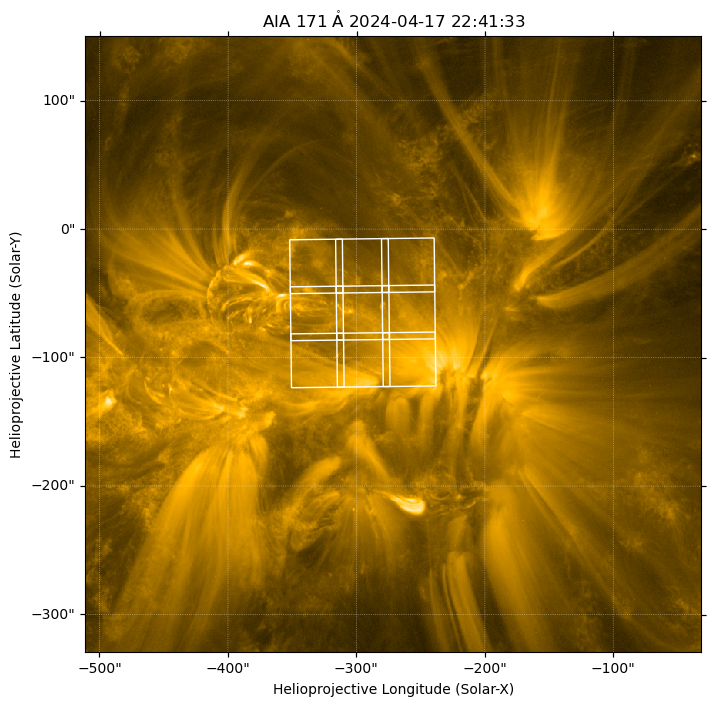

In [36]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection=aia)

aia.plot(axes=ax)

# Iterate over each tile plotting the extent of the WCS for each one
for i, tile in enumerate(first_tiles.flat):
    drawing.extent(ax, tile.wcs) #, color=f"C{i}")
# Zoom in on the VBI region using pixel coordinates
    _ = ax.axis((1200, 2000, 1500, 2300))
